In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data

In [48]:
start = '2020-01-01'
end = '2022-03-01'

df = data.DataReader('AAPL','yahoo',start,end)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-12-31,73.419998,72.379997,72.482498,73.412498,100805600.0,72.139946
2020-01-02,75.150002,73.797501,74.059998,75.087502,135480400.0,73.785904
2020-01-03,75.144997,74.125000,74.287498,74.357498,146322800.0,73.068565
2020-01-06,74.989998,73.187500,73.447502,74.949997,118387200.0,73.650787
2020-01-07,75.224998,74.370003,74.959999,74.597504,108872000.0,73.304405


In [37]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-02-23,166.149994,159.750000,165.539993,160.070007,90009200.0,159.835175
2022-02-24,162.850006,152.000000,152.580002,162.740005,141147500.0,162.501251
2022-02-25,165.119995,160.869995,163.839996,164.850006,91974200.0,164.608154
2022-02-28,165.419998,162.429993,163.059998,165.119995,95056600.0,164.877747
2022-03-01,166.600006,161.970001,164.699997,163.199997,83474400.0,162.960571


In [50]:
df = df.reset_index()
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2019-12-31,73.419998,72.379997,72.482498,73.412498,100805600.0,72.139946
1,2020-01-02,75.150002,73.797501,74.059998,75.087502,135480400.0,73.785904
2,2020-01-03,75.144997,74.125000,74.287498,74.357498,146322800.0,73.068565
3,2020-01-06,74.989998,73.187500,73.447502,74.949997,118387200.0,73.650787
4,2020-01-07,75.224998,74.370003,74.959999,74.597504,108872000.0,73.304405


In [51]:
df = df.drop(['Date','Adj Close'],axis = 1)
df.head()

,High,Low,Open,Close,Volume
0,73.419998,72.379997,72.482498,73.412498,100805600.0
1,75.150002,73.797501,74.059998,75.087502,135480400.0
2,75.144997,74.125000,74.287498,74.357498,146322800.0
3,74.989998,73.187500,73.447502,74.949997,118387200.0
4,75.224998,74.370003,74.959999,74.597504,108872000.0


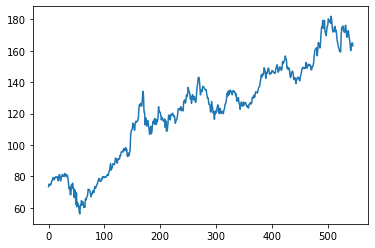

In [52]:
plt.plot(df.Close)

In [45]:
df

,index,High,Low,Open,Close,Volume
0,0,134.740005,131.720001,134.080002,132.690002,99116600.0
1,1,133.610001,126.760002,133.520004,129.410004,143301900.0
2,2,131.740005,128.429993,128.889999,131.009995,97664900.0
3,3,131.050003,126.379997,127.720001,126.599998,155088000.0
4,4,131.630005,127.860001,128.360001,130.919998,109578200.0
...,...,...,...,...,...,...
288,288,166.149994,159.750000,165.539993,160.070007,90009200.0
289,289,162.850006,152.000000,152.580002,162.740005,141147500.0
290,290,165.119995,160.869995,163.839996,164.850006,91974200.0
291,291,165.419998,162.429993,163.059998,165.119995,95056600.0


In [53]:
ma100 = df.Close.rolling(100).mean()
ma100

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
541    162.456600
542    162.657500
543    162.914601
544    163.154700
545    163.366700
Name: Close, Length: 546, dtype: float64

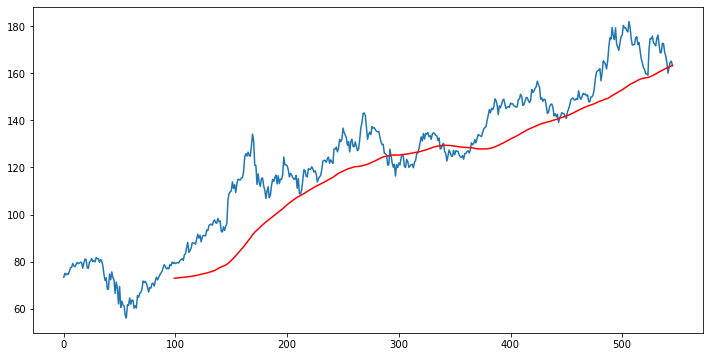

In [54]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')

In [55]:
ma200 = df.Close.rolling(200).mean()
ma200

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
         ...    
541    151.43705
542    151.62120
543    151.83160
544    152.03235
545    152.21110
Name: Close, Length: 546, dtype: float64

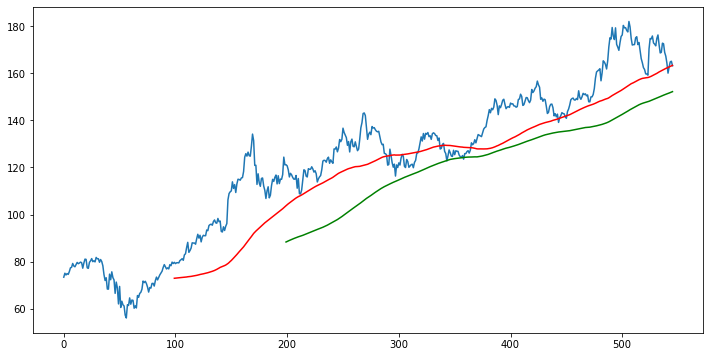

In [56]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [57]:
df.shape

(546, 5)

In [62]:
#spliting data into Training and testing

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(382, 1)
(164, 1)


In [63]:
data_training.head()

,Close
0,73.412498
1,75.087502
2,74.357498
3,74.949997
4,74.597504


In [65]:
data_testing.head()

,Close
382,143.240005
383,145.110001
384,144.500000
385,145.639999
386,149.149994


In [66]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [67]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.19575596],
       [0.21468736],
       [0.20643664],
       [0.21313324],
       [0.20914925],
       [0.22271199],
       [0.24090871],
       [0.24288656],
       [0.26162015],
       [0.24952668],
       [0.24574042],
       [0.25676015],
       [0.26662148],
       [0.26051822],
       [0.26371114],
       [0.26803426],
       [0.2654347 ],
       [0.23898734],
       [0.26368285],
       [0.28247292],
       [0.2811449 ],
       [0.24056965],
       [0.2381679 ],
       [0.26696053],
       [0.27430705],
       [0.28493116],
       [0.27029469],
       [0.27458954],
       [0.26910791],
       [0.29055412],
       [0.28397047],
       [0.28419657],
       [0.26738435],
       [0.2804385 ],
       [0.27105757],
       [0.25057213],
       [0.20855582],
       [0.18001748],
       [0.19293038],
       [0.13887708],
       [0.13842498],
       [0.21033595],
       [0.18352125],
       [0.22144044],
       [0.19369334],
       [0.18270181],
       [0.11810916],
       [0.172

In [68]:
data_training_array.shape

(382, 1)

In [70]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i,0])
    
x_train,y_train = np.array(x_train),np.array(y_train)

In [75]:
x_train.shape

(282, 100, 1)

In [ ]:
#ML Model

In [74]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [81]:
model = Sequential()
model.add(LSTM(units = 50,activation = 'relu',return_sequences = True,
                  input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))



model.add(LSTM(units = 60,activation = 'relu',return_sequences = True))
model.add(Dropout(0.3))




model.add(LSTM(units = 80,activation = 'relu',return_sequences = True))
model.add(Dropout(0.4))


model.add(LSTM(units = 120,activation = 'relu'))
model.add(Dropout(0.5))



model.add(Dense(units =1))

In [82]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 100, 50)           10400     
                                                                 
 dropout_4 (Dropout)         (None, 100, 50)           0         
                                                                 
 lstm_5 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_5 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_6 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_6 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_7 (LSTM)               (None, 120)              

In [83]:
model.compile(optimizer = 'adam',loss = 'mean_squared_error')
model.fit(x_train,y_train,epochs = 50)

Epoch 1/50
9/9 [==============================] - 7s 315ms/step - loss: 0.4148
Epoch 2/50
9/9 [==============================] - 3s 306ms/step - loss: 0.1100
Epoch 3/50
9/9 [==============================] - 3s 304ms/step - loss: 0.1592
Epoch 4/50
9/9 [==============================] - 3s 304ms/step - loss: 0.0931
Epoch 5/50
9/9 [==============================] - 3s 297ms/step - loss: 0.0431
Epoch 6/50
9/9 [==============================] - 3s 284ms/step - loss: 0.0299
Epoch 7/50
9/9 [==============================] - 2s 209ms/step - loss: 0.0301
Epoch 8/50
9/9 [==============================] - 1s 148ms/step - loss: 0.0252
Epoch 9/50
9/9 [==============================] - 1s 166ms/step - loss: 0.0258
Epoch 10/50
9/9 [==============================] - 2s 272ms/step - loss: 0.0247
Epoch 11/50
9/9 [==============================] - 3s 297ms/step - loss: 0.0211
Epoch 12/50
9/9 [==============================] - 3s 292ms/step - loss: 0.0222
Epoch 13/50
9/9 [==============================] 

In [84]:
model.save('keras_model.h5')

In [85]:
data_testing.head()

,Close
382,143.240005
383,145.110001
384,144.500000
385,145.639999
386,149.149994


In [86]:
past_100_days = data_training.tail(100)

In [87]:
final_df = past_100_days.append(data_testing,ignore_index=True)

In [88]:
final_df.head()

,Close
0,135.369995
1,133.190002
2,130.839996
3,129.710007
4,129.869995


In [89]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.28956582],
       [0.25635953],
       [0.22056355],
       [0.20335122],
       [0.20578821],
       [0.1468393 ],
       [0.14470679],
       [0.13693829],
       [0.07052548],
       [0.07463826],
       [0.17410512],
       [0.13343493],
       [0.08682403],
       [0.0574257 ],
       [0.07707537],
       [0.        ],
       [0.07204868],
       [0.05514095],
       [0.08530082],
       [0.07113478],
       [0.11622236],
       [0.14028941],
       [0.12795129],
       [0.06351864],
       [0.05529318],
       [0.10708301],
       [0.09413558],
       [0.05681639],
       [0.06443254],
       [0.0738766 ],
       [0.07661842],
       [0.05392233],
       [0.088195  ],
       [0.10114242],
       [0.1453161 ],
       [0.15003807],
       [0.17578069],
       [0.21325211],
       [0.25346536],
       [0.22665661],
       [0.27524743],
       [0.23869002],
       [0.2763138 ],
       [0.27113488],
       [0.28149273],
       [0.25514092],
       [0.26108151],
       [0.237

In [90]:
input_data.shape

(264, 1)

In [91]:
x_test = []
y_test = []

for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

In [92]:
x_test,y_test = np.array(x_test),np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(164, 100, 1)
(164,)


In [93]:
# Making predictions

y_predicted = model.predict(x_test)

6/6 [==============================] - 2s 50ms/step


In [94]:
y_predicted.shape

(164, 1)

In [95]:
y_test

array([0.40944413, 0.43792845, 0.42863674, 0.44600155, 0.49946681,
       0.4892612 , 0.45742577, 0.39741049, 0.45376993, 0.44234571,
       0.46367106, 0.49047982, 0.49702982, 0.46321411, 0.43594818,
       0.44600155, 0.44935267, 0.44417375, 0.47220111, 0.46595581,
       0.46763138, 0.45361769, 0.45285603, 0.44539236, 0.44935267,
       0.4955065 , 0.49870539, 0.52947445, 0.51530853, 0.45696882,
       0.46214774, 0.48484394, 0.50799709, 0.50662601, 0.4874334 ,
       0.47494281, 0.49108924, 0.55993904, 0.54028948, 0.55064733,
       0.56801214, 0.57791327, 0.61431844, 0.59025139, 0.5744099 ,
       0.49672511, 0.50555987, 0.48377757, 0.49763901, 0.49398318,
       0.45239908, 0.4048744 , 0.41233807, 0.44920043, 0.46412801,
       0.46549886, 0.44188876, 0.38918516, 0.40319884, 0.38293986,
       0.4004569 , 0.34699164, 0.37699927, 0.39055601, 0.41020556,
       0.40426498, 0.40289413, 0.3830921 , 0.37395286, 0.41736476,
       0.43381566, 0.45986299, 0.49352623, 0.50114238, 0.50449

In [96]:
y_predicted

array([[0.2892699 ],
       [0.29256004],
       [0.29670823],
       [0.3017221 ],
       [0.30759227],
       [0.314394  ],
       [0.32214516],
       [0.33079034],
       [0.34021544],
       [0.3503394 ],
       [0.3610713 ],
       [0.3723327 ],
       [0.38406718],
       [0.39621586],
       [0.40868354],
       [0.42132878],
       [0.43400377],
       [0.4465558 ],
       [0.4588474 ],
       [0.47077447],
       [0.48225605],
       [0.4932282 ],
       [0.5036359 ],
       [0.5134357 ],
       [0.52259165],
       [0.53108096],
       [0.53893095],
       [0.5461925 ],
       [0.5529423 ],
       [0.55924606],
       [0.56511647],
       [0.57054824],
       [0.57554823],
       [0.58014536],
       [0.58437747],
       [0.58826774],
       [0.59182346],
       [0.5950582 ],
       [0.5980388 ],
       [0.6008293 ],
       [0.60349184],
       [0.6060848 ],
       [0.6086639 ],
       [0.61129165],
       [0.61400247],
       [0.6167939 ],
       [0.6195874 ],
       [0.622

In [97]:
scaler.scale_

array([0.01523229])

In [98]:
scale_factor = 1/0.01523229
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

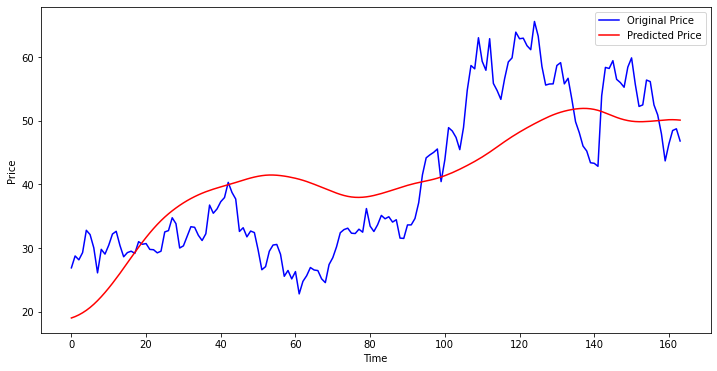

In [99]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b',label='Original Price')
plt.plot(y_predicted,'r',label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()